In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from glob import glob
import random
import cv2
import json
import os
import shutil

from webbox.generate_links import generate_wiki_links
from webbox.webbox import WebBoxGenerator

/home/nazarii/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# GENERATE LINKS

In [133]:
links = generate_wiki_links(1000, 'Интернет')

In [134]:
len(links)

965

# GENERATE DATASET

In [ ]:
shutil.rmtree('../dataset/', ignore_errors=True)

wbx = WebBoxGenerator(path='../', links=links, sleep_time=0.2)

try:
    wbx.generate_dataset(thresh=1, ksize=(3,3))
finally:
    del wbx

Screenshots in ../dataset/screenshots
Annotations in ../dataset/annotations


# RESULT

In [ ]:
def plot_annotated(title, path):
    orig_img = cv2.cvtColor(cv2.imread(path+'screenshots/'+title+'.png'), cv2.COLOR_BGR2RGB)
    bboxes = (json.load(open(path+'annotations/'+title+'.json', 'r')))['form']['words']

    fig, ax = plt.subplots(1, figsize=(60,30))
    ax.imshow(orig_img)

    for pol in bboxes:
        pol = np.asarray(pol['box'])
        rec = Rectangle(pol[[0,1]], *(pol[[2,3]] - pol[[0,1]]), 
                        linewidth=1, 
                        edgecolor='r', 
                        facecolor='none')
        ax.add_patch(rec,)

    plt.axis('off')
    plt.show()

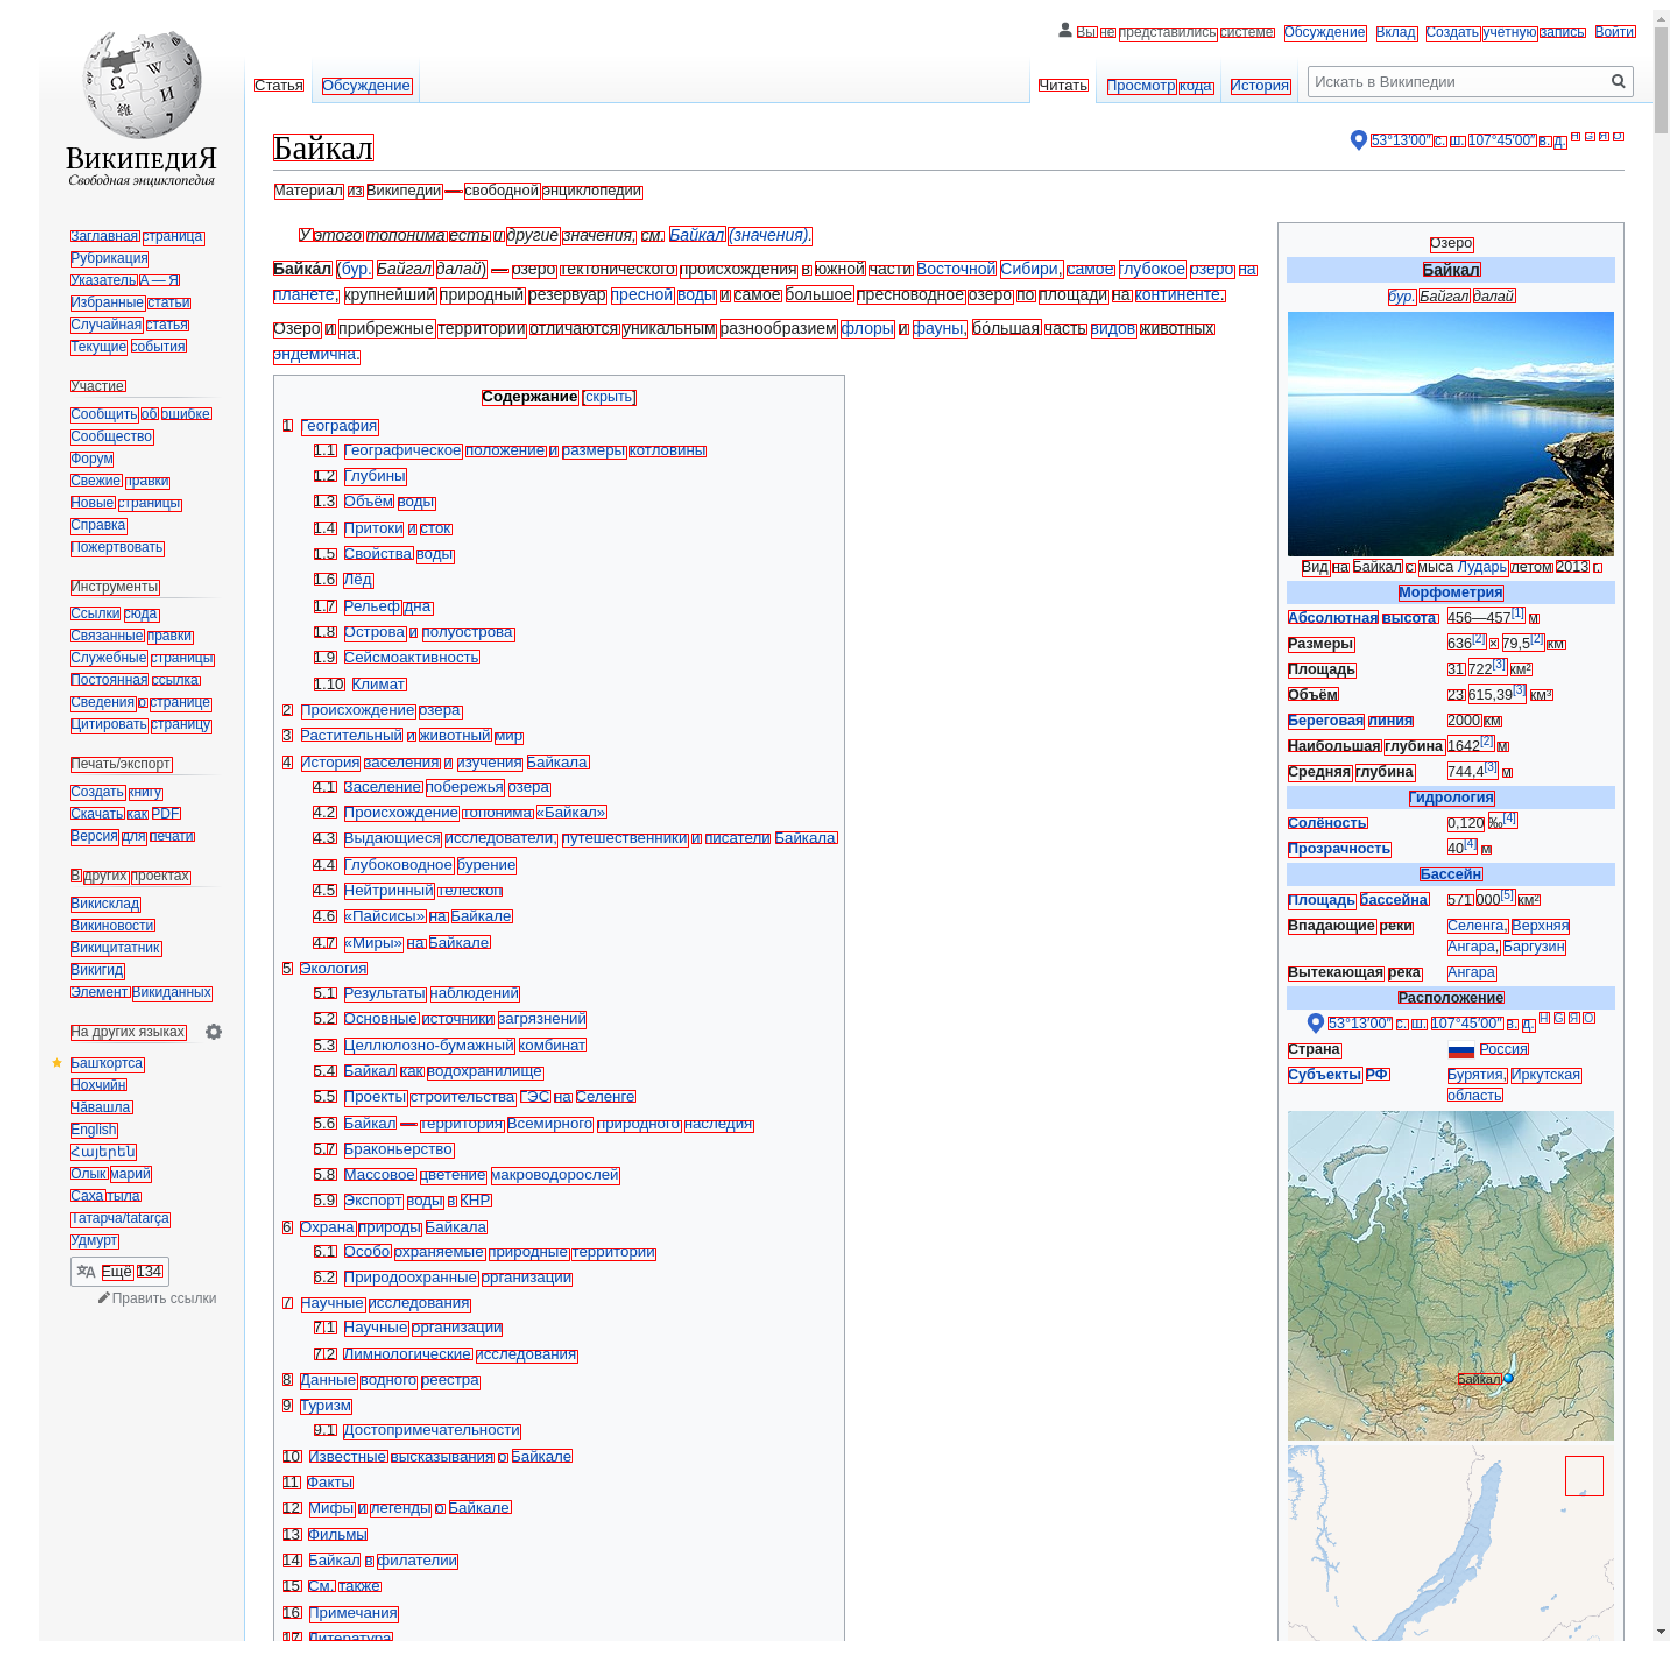

In [34]:
images = [img.split('/')[-1] for img in glob('../dataset/screenshots/*.png')]
title = random.choice(images).split('.')[0]

plot_annotated(title, '../dataset/')

# Validation

In [16]:
import ipywidgets as widgets
from ipywidgets import Button, widgets
from IPython.display import clear_output, display

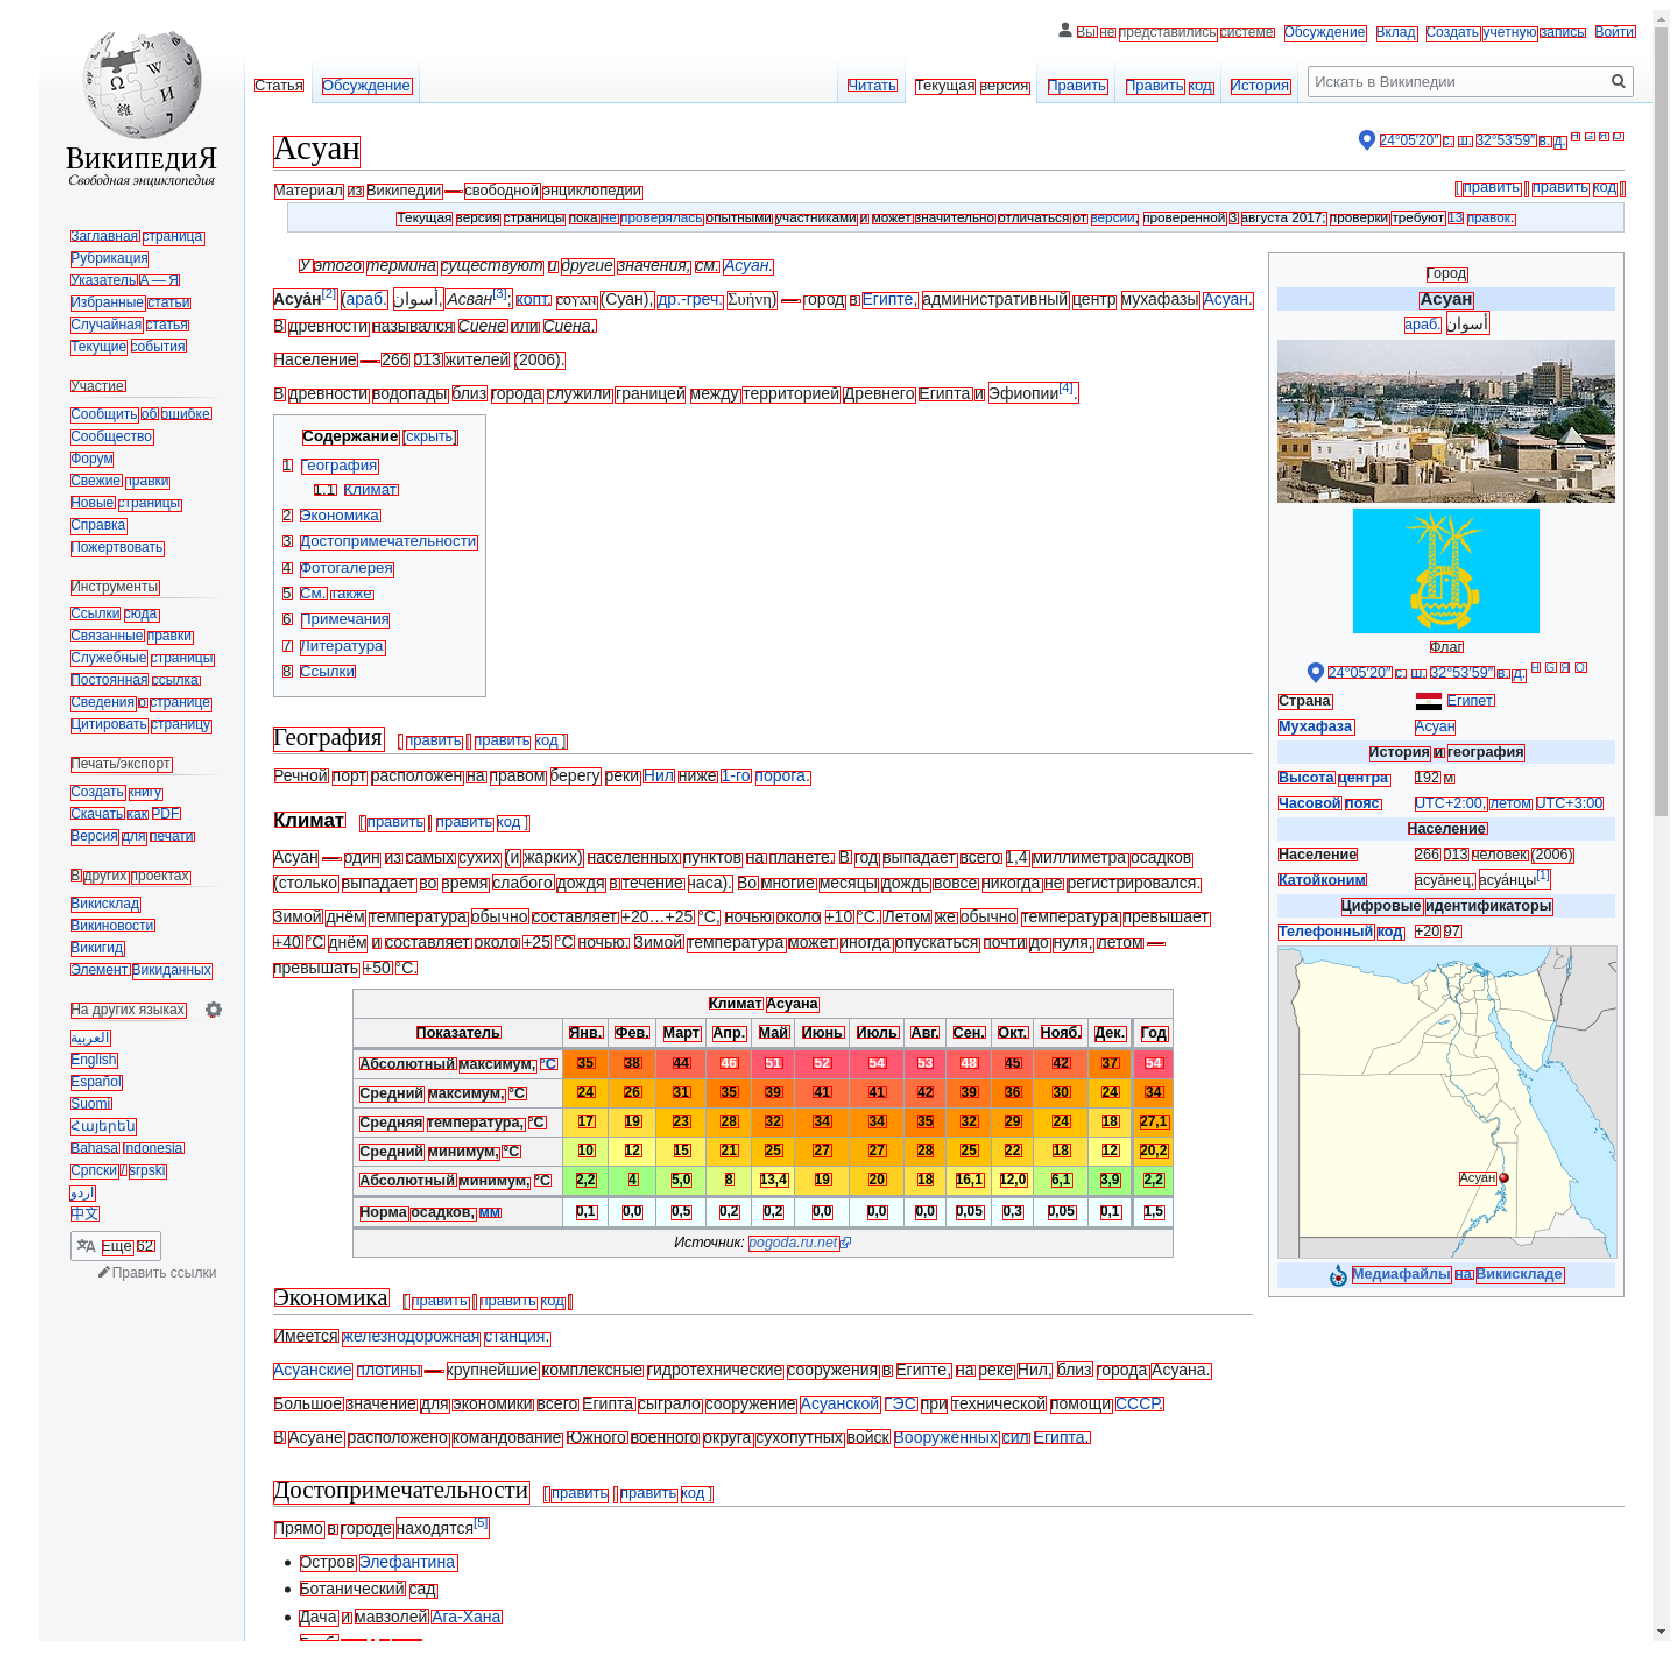

In [91]:
images = [img.split('/')[-1].replace('.png', '') for img in glob('../dataset/screenshots/*.png')]
result = {}  

    
data_path='../dataset/'
img_generator = iter(images)
cur_img = next(img_generator)

button_ok = Button(description="OK")
button_bad = Button(description="BAD")
out = widgets.Output()


def on_button_ok(_, status='OK'):
    global cur_img, img_generator, vbox
    clear_output()
    result.update({cur_img: status})
    cur_img = next(img_generator)
    
    plot_annotated(cur_img, data_path)
    display(vbox)

def on_button_bad(_):
    return on_button_ok(_, status='BAD')

button_ok.on_click(on_button_ok)
button_bad.on_click(on_button_bad)
buttons = widgets.HBox([button_ok, button_bad])
vbox = widgets.VBox([buttons, out])

plot_annotated(cur_img, data_path)
display(vbox)

In [93]:
result

{'b1d9779d-4e64-4324-83f6-4c347cacd3cf': 'OK',
 'b64513b7-2dc5-49be-b846-130bd0c05d08': 'OK',
 '320222e5-f132-4a07-b39c-e070c805d7f3': 'OK',
 '3cd86460-ab96-4a6c-8ebb-038f2cc49128': 'OK',
 '960bc7ae-e8b4-47d9-a395-d6cedd91d1fe': 'OK',
 'e2f78237-594d-4303-8650-03f6df3d18fc': 'OK',
 '6f9519c0-d953-4152-b1fe-53f271e3ccc7': 'OK',
 '81256150-8f35-489f-b446-36efa29185a5': 'BAD',
 'e6b0ae02-6056-473d-ad1c-21e0a6d271ed': 'OK',
 '7f10a569-a729-4033-af9e-c632042c3202': 'OK',
 '5bf24253-0d7e-4ade-8144-47a90b1e88f2': 'OK',
 '5f1c520d-228f-4cf2-bd12-c47951642bb2': 'BAD'}